# Problem Set 4
## Nora Nickels
### Perspectives of Computational Modeling
### Winter 2018

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

## Problem 1: Multiple Linear Regression

### 1a: Import the data

In [36]:
auto = pd.read_csv('auto.csv', na_values = "?")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [38]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### 1b: Produce a scatterplot matrix.

<IPython.core.display.Javascript object>


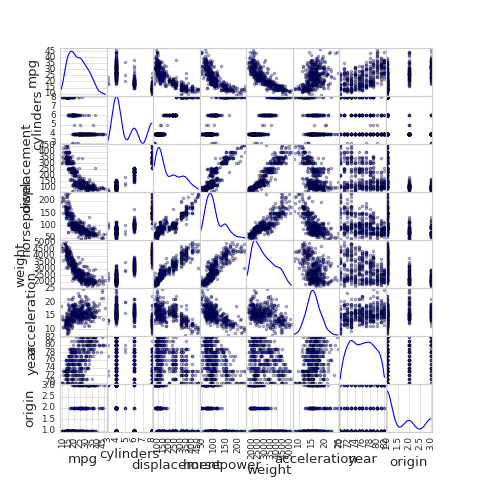

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12594c278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127800550>]], dtype=object)

In [39]:
from pandas.tools.plotting import scatter_matrix
%matplotlib notebook
scatter_matrix(auto, alpha=0.3, figsize=(6, 6), diagonal='kde')

### 1c: Compute the correlation matrix

In [40]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### 1d: Estimate the multiple linear regression model.

In [41]:
auto['const'] = 1

reg1 = sm.OLS(auto['mpg'], auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing='drop')
type(reg1)
results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        14:54:04   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

* i. β2, β4, β6, and β7 (coefficients for displacement, weight, year and origin, respectively) are statistically significant at the 1% level.
* ii. β1, β3, and β5 (coefficients for cylinders, horsepower, and acceleration) are not statistically significant at the 10% level.
* iii. Keeping all else constant, a single unit change in year (AKA, one year) results in a 0.7508 unit (miles per gallon) increase in MPG (the dependent variable).

### 1e: 
* Based on the scatterplot matrix from part b, displacement, horsepower, and weight look most likely to have a nonlinear relationship with mpg.  

In [42]:
# i.

# create squared variables for new regression model.
auto['displacement2'] = auto.displacement.apply(lambda x: x**2)
auto['horsepower2'] = auto.horsepower.apply(lambda x: x**2)
auto['weight2'] = auto.weight.apply(lambda x: x**2)
auto['acceleration2'] = auto.acceleration.apply(lambda x: x**2)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,displacement2,horsepower2,weight2,acceleration2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25


In [43]:
reg2 = sm.OLS(auto['mpg'], auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin', 'displacement2', 'horsepower2', 'weight2', 'acceleration2']], missing='drop')

results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        14:54:18   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            20.1084      6.696      3.003

* ii. The adjusted R-squared statistic for the second regression model is 0.866. This is improved when compared to the adjusted R-squared statistic from the first model (0.818).

* iii. The coefficient for displacement is no longer statistically significant; the coefficient for displacement squared is not statistically significant either. 

* iv. The coefficients for cylinders is still not statistically significant in this model.

### 1f. Predicted mpg.

In [44]:
results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])

array([ 38.7321111])

The predicted mpg of this car would be 38.7 mpg.

## Problem 2: Classification problem: KNN by hand and in python.

In [45]:
import math 
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

### 2a: 

In [46]:
dist_obs1 = math.sqrt((0 - 0)**2 + (0 - 3)**2 + (0 - 0)**2)
dist_obs2 = math.sqrt((0 - 2)**2 + (0 - 0)**2 + (0 - 0)**2)
dist_obs3 = math.sqrt((0 - 0)**2 + (0 - 1)**2 + (0 - 3)**2)
dist_obs4 = math.sqrt((0 - 0)**2 + (0 - 1)**2 + (0 - 2)**2)
dist_obs5 = math.sqrt((0 - (-1))**2 + (0 - 0)**2 + (0 - 1)**2)
dist_obs6 = math.sqrt((0 - 1)**2 + (0 - 1)**2 + (0 - 1)**2)

print("The Euclidean distance between observation 1 and the test point is", dist_obs1)
print("The Euclidean distance between observation 2 and the test point is", dist_obs2)
print("The Euclidean distance between observation 3 and the test point is", dist_obs3)
print("The Euclidean distance between observation 4 and the test point is", dist_obs4)
print("The Euclidean distance between observation 5 and the test point is", dist_obs5)
print("The Euclidean distance between observation 6 and the test point is", dist_obs6)

The Euclidean distance between observation 1 and the test point is 3.0
The Euclidean distance between observation 2 and the test point is 2.0
The Euclidean distance between observation 3 and the test point is 3.1622776601683795
The Euclidean distance between observation 4 and the test point is 2.23606797749979
The Euclidean distance between observation 5 and the test point is 1.4142135623730951
The Euclidean distance between observation 6 and the test point is 1.7320508075688772


### 2b:

For K = 1, we choose the one observation which is nearest to the test point. In this case, that observation is observation 5 (Y = green), so our KNN prediction for K = 1 is Y = green.

### 2c:

For K = 3, we choose the three observations which are nearest to the test point. In this case, those observations are observation 2 (Y = red), observation 5 (Y = green), and observation 6 (Y = red). So our KNN prediction for K = 3 is Y = red.

### 2d:

If the Bayes Optimal Decision Boundary is highly nonlear, then we would expect the best value for K to be small. This is because as K gets small, the boundary line becomes much more nuanced and rougher; as K gets larger the boundary line becomes much smoother; if you add another data point it wont move the line very much. In general, if the optimal decision line is highly nonlinear, then we choose a K that is smaller. The more linear the optimal line is, the higher K you want.

### 2e:

In [47]:
from sklearn import datasets, neighbors, linear_model

# create KNN data set.
KNNdata = {'X1' : [0, 2, 0 , 0, -1, 1], 'X2' : [3, 0, 1, 1, 0, 1], \
           'X3' : [0, 0, 3, 2, 1, 1], 'Y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}


knn = pd.DataFrame.from_dict(data=KNNdata)

y = knn['Y']
x = np.column_stack((knn['X1'], knn['X2'], knn['X3']))

knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
knn_pred = knn_classifier.fit(x, y)
print('The estimated KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is', knn_pred.predict([(1, 1, 1)]))


The estimated KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is ['Green']


## Problem 3: Multivariable logistic (logit) regression

In [48]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# What's the median of auto dataset?
auto2 = auto.iloc[:, 0:10]
mpg_median = auto['mpg'].median()

# Create a binary variable of mpg_high
auto2['mpg_high'] = auto2['mpg'].apply(lambda x: 1 if x >= mpg_median else 0)
mpg_median

23.0

In [49]:
auto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 11 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
const           397 non-null int64
mpg_high        397 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 34.2+ KB


In [50]:
auto2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0


In [51]:
auto2 = auto2.dropna()

### 3a: Estimate logistic regression.

In [52]:
# Define X array variables for logit model.
X = pd.concat((auto2.loc[:,"cylinders":"origin"], auto2.const), axis = 1)

In [53]:
# Estimate the logistic regression with the estimators from Problem 1.
LogitModel = sm.Logit(auto2.mpg_high, X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        14:54:52   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701        -0.992     0.667
displacement     0.0021      0.012      0.174      0.862        -0.021     0.026
horsepower      -0.0410      0.024     -1.718      0.086        -0.088     0.006
weight          -0.0043      0.001     -3.784      0.000        -0.007    -0.002
acceleration     0.0161      0.141      0.114      0.910        -0.261     0.293
year             0.4295      0.075      5.709      0.000         0.282     0.577
origin           0.4773      0.362      1.319      0.187        -0.232     1.187
const          -17.1549      5.764     -2.976      0.003       -28.452    -5.858
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Weight and year are the regressors that have coefficients that are statistically significant at the 5% level.

### 3b: Divide data into training and test set.

In [54]:
y = auto2.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5,
                                                    random_state=10)

### 3c: Estimate a logistic regression model on the training data.

In [55]:
# use training to estimate the model
LogReg = LogisticRegression()
logreg_results = LogReg.fit(X_train, y_train)
logreg_results

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
LogReg.coef_

array([[-0.33709221,  0.000466  , -0.05200648, -0.00490103, -0.18191715,
         0.30925357, -0.09542257, -0.032587  ]])

In [57]:
LogReg.intercept_

array([-0.032587])

The estimated intercept from the logistic regression model is -0.032587, and the estimated coefficients from the logistic regression model are -0.33709221,  0.000466  , -0.05200648, -0.00490103, -0.18191715, 0.30925357, and -0.09542257 (for cylinders, displacement, horsepower, weight, acceleration, year and origin, respectively).

### 3d: Create predicted values.

In [58]:
# Create predicted values using test set.

y_pred = LogReg.predict(X_test)

In [59]:
# Report confusion matrix.

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

The confusion matrix tells us Type I and Type II errors. The results from the confusion matrix are telling us that 86 and 85 are the number of correct predictions. 12 (false negatives, Type II errors) and 13 (false positives, Type I errors) are the number of incorrect predictions.

In [60]:
# Classification report. 

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The precision columns tell us how well the model gets it right for predicting low mpg and high mpg. The model predicts both high and low mpg very well, but it predicts low mpg (88%) slightly better than predicting high mph (87%).